# k-Means Clustering

In this notebook, you will implement the k-means clustering algorithm.

## Packages

Following packages is all you need. Do not import any additional packages!

In case you are not familiar with [Numpy](http://www.numpy.org/) library, it provides support for large multi-dimensional arrays and matrices, along with functions to operate on these. [Matplotlib](https://matplotlib.org/) is a plotting library.

In [19]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## Function

A function for plotting that we are going to use later on.

In [20]:
def plot_clusters(data, centroids):
    """
    Shows a scatter plot with the data points clustered according to the centroids.
    """
    # Assigning the data points to clusters/centroids.
    clusters = [[] for _ in range(centroids.shape[0])]
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters[np.argmin(distances)].append(data[i])

    # Plotting clusters and centroids.
    fig, ax = plt.subplots()
    for c in range(centroids.shape[0]):
        if len(clusters[c]) > 0:
            cluster = np.array(clusters[c])
            ax.scatter(cluster[:, 0], cluster[:, 1], s=7)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

## Data

Let us generate a dataset you are going to play with. We will stay in the Euclidean space because it is easy to plot.

In [21]:
# We would like to have some control over the randomly generated data.
# This is just for development purposes.
np.random.seed(0)

# Euclidean space.
DIMENSIONS = 2

# We will generate clusters.
CLUSTERS = [
    {
        'mean': (50, 50),
        'std': (5, 10),
        'size': 300
    },
    {
        'mean': (10, 85),
        'std': (10, 3),
        'size': 100
    },
    {
        'mean': (10, 10),
        'std': (6, 6),
        'size': 200
    },
    {
        'mean': (10, 75),
        'std': (10, 5),
        'size': 200
    },
    {
        'mean': (80, 20),
        'std': (5, 5),
        'size': 100
    }
]

# Initializing the dataset with zeros.
synthetic_data = np.zeros((np.sum([c['size'] for c in CLUSTERS]), DIMENSIONS))

# Generating the clusters.
start = 0
for c in CLUSTERS:
    for d in range(DIMENSIONS):
        synthetic_data[start:start + c['size'], d] = np.random.normal(c['mean'][d], c['std'][d], (c['size']))
    start += c['size']
print(synthetic_data)

[[58.82026173 36.93473148]
 [52.00078604 66.5813068 ]
 [54.89368992 48.81835955]
 ...
 [80.85621773 20.91725127]
 [80.19454353 17.64628751]
 [83.13282125 21.36398195]]


In [22]:
print('shape (size, dimensions) =', synthetic_data.shape)

shape (size, dimensions) = (900, 2)


And this is how our data look like when plotted.

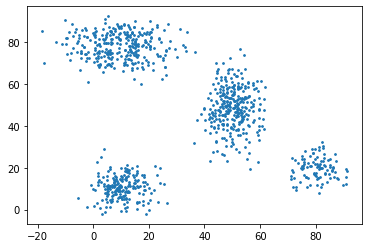

In [23]:
plt.figure()
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=3)

## Implementation

A human can with an ease find five distinct clusters just by watching the plot. A computer, however, needs to be told how to find the clusters.

**Exercise:**

Implement the k-means clustering algorithm.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [30]:
def euchlidean_l2(a, b):
    return np.sum(np.sqrt(np.square(a - b)), axis=1)

def kmeans(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        initial centroids
    :return
        final centroids
    """
    ### START CODE HERE ### 
    euch_dist = np.zeros((data.shape[0], centroids.shape[0]))
    old_centroids = centroids.copy()

    while True:
        next_iteration_centroids = old_centroids.copy()
        for i in range(next_iteration_centroids.shape[0]):
            euch_dist[:, i] = euchlidean_l2(data, next_iteration_centroids[i])
            # euch_dist[:, i] = np.linalg.norm((data - next_iteration_centroids[i]), axis=1)
        cluster_points = np.zeros((data.shape[0], next_iteration_centroids.shape[0]))
        min_dist = np.amin(euch_dist, axis=1)

        for i in range(next_iteration_centroids.shape[0]):
            cluster_points[:, i] = euch_dist[:, i] == min_dist
        
        for i in range(next_iteration_centroids.shape[0]):
            next_iteration_centroids[i] = np.mean(data[cluster_points[:, i] == 1], axis=0)

        if np.all(old_centroids - next_iteration_centroids) == 0:
            centroids = next_iteration_centroids
            break
        
        old_centroids = next_iteration_centroids.copy()

        

    ### END CODE HERE ### 
    return centroids

We have prepared for you a small piece of code, so that you can test that the function works according the expectations.

c0 = [10 23]
c1 = [49 49]
c2 = [76 21]


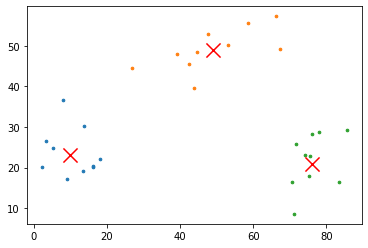

In [31]:
test_data = np.array([
    [66.24345364, 57.31053969],
    [43.88243586, 39.69929645],
    [44.71828248, 48.38791398],
    [39.27031378, 48.07972823],
    [58.65407629, 55.66884721],
    [26.98461303, 44.50054366],
    [67.44811764, 49.13785896],
    [42.38793099, 45.61070791],
    [53.19039096, 50.21106873],
    [47.50629625, 52.91407607],
    [2.29566576, 20.15837474],
    [18.01306597, 22.22272531],
    [16.31113504, 20.1897911],
    [13.51746037, 19.08356051],
    [16.30599164, 20.30127708],
    [5.21390499, 24.91134781],
    [9.13976842, 17.17882756],
    [3.44961396, 26.64090988],
    [8.12478344, 36.61861524],
    [13.71248827, 30.19430912],
    [74.04082224, 23.0017032],
    [70.56185518, 16.47750154],
    [71.26420853, 8.57481802],
    [83.46227301, 16.50657278],
    [75.25403877, 17.91105767],
    [71.81502177, 25.86623191],
    [75.95457742, 28.38983414],
    [85.50127568, 29.31102081],
    [75.60079476, 22.85587325],
    [78.08601555, 28.85141164]
])
test_centroids = np.array([
    [25, 50],
    [50, 50],
    [75, 50]
])

test_centroids = kmeans(test_data, test_centroids)

print('c0 =', test_centroids[0])
print('c1 =', test_centroids[1])
print('c2 =', test_centroids[2])
plot_clusters(test_data, test_centroids)

We expect the output to be similar to following.

```
c0 = [ 9 25]
c1 = [50 50]
c2 = [75 20]
```

If it is not the case, review your implementation, debug your algorithm, try it on paper, ...

## Clustering

Ready to run your implementation of k-means clustering on the dataset? Let's do it...

First, we need to initialize the centroids. We will go for a random initialization eventhough there are some disadvantages of doing so (see the Introduction to Data Mining from Tan et al.).

c0 = [88. 43.]
c1 = [75. 65.]
c2 = [17. 56.]
c3 = [61.  1.]
c4 = [28. 68.]


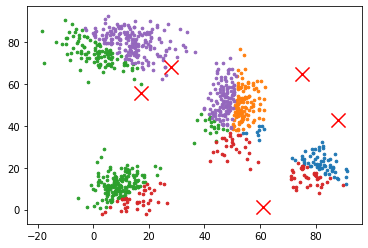

In [32]:
# Number of clusters.
K = 5

# Boundaries of our data.
x_min = np.min(synthetic_data[:, 0])
x_max = np.max(synthetic_data[:, 0])
y_min = np.min(synthetic_data[:, 1])
y_max = np.max(synthetic_data[:, 1])

# Generating random centroids within the data boundaries.
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Finally, we run the `kmeans()` function you have implemented.

c0 = [80.11686062 19.69811265]
c1 = [50.4164693 50.9436439]
c2 = [10.40705505 10.57646643]
c3 = [47.77429001 31.88522513]
c4 = [ 9.55339231 78.22785577]


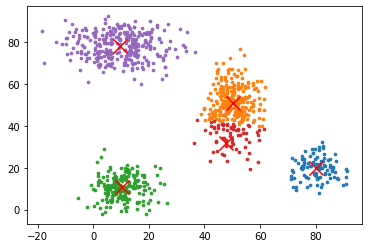

In [33]:
centroids = kmeans(synthetic_data, centroids)

# plt.scatter(data[:, 0], data[:, 1], s=3)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Congratulations! At this point, hopefully, you have found all five distinct clusters with the centroids aligned in their centers.

## Evaluation of Clustering

Silhouette Coefficient is an example of a measure for validation of the cluster quality.

**Exercise:**

Implement a function calculating the mean Silhouette Coefficient of all samples.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [34]:
def silhouette_score(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        centroids
    :return
        mean Silhouette Coefficient of all samples
    """
    ### START CODE HERE ### 
    euch_dist = np.zeros((data.shape[0], centroids.shape[0]))
    silhoutte_scores = np.zeros(data.shape[0])
    for i in range(centroids.shape[0]):
        euch_dist[:, i] = euchlidean_l2(data, centroids[i])
    
    cluster_points = np.zeros((data.shape[0], centroids.shape[0]))
    min_dist = np.amin(euch_dist, axis=1)

    for i in range(centroids.shape[0]):
        cluster_points[:, i] = euch_dist[:, i] == min_dist
    
    for i in range(centroids.shape[0]):
        this_cluster_points = data[cluster_points[:, i] == 1]
        avg_this_cluster_point_dist = np.zeros(this_cluster_points.shape[0])
        for point in range(this_cluster_points.shape[0]):
            avg_this_cluster_point_dist[point] = np.mean(euchlidean_l2(this_cluster_points[point], this_cluster_points))

        dist_to_other_cluster_points = np.zeros(this_cluster_points.shape[0])
        for point in range(this_cluster_points.shape[0]):
            dist_to_other_cluster_points[point] = float("inf")
            for j in range(centroids.shape[0]):
                if(i == j):
                    continue
                other_cluster_points = data[cluster_points[:, j] == 1]
                dist_to_other_cluster = np.mean(euchlidean_l2(this_cluster_points[point], other_cluster_points))
                if dist_to_other_cluster < dist_to_other_cluster_points[point]:
                    dist_to_other_cluster_points[point] = dist_to_other_cluster
        
        a = avg_this_cluster_point_dist
        b = dist_to_other_cluster_points
        silhoutte_scores[cluster_points[:, i] == 1] = (b - a)/np.maximum(a, b)
    
    score = np.mean(silhoutte_scores)


    
    ### END CODE HERE ### 
    return score

First, let's see if the algorithm executes on the test data.

In [35]:
silhouette_score(test_data, test_centroids)

0.7249437983722198

We expect the output to be around `0.675`.

Finally, let's cluster again our synthetic data and calculate the Silhouette Coefficient.

silhouette_coefficient = 0.6288985346520989


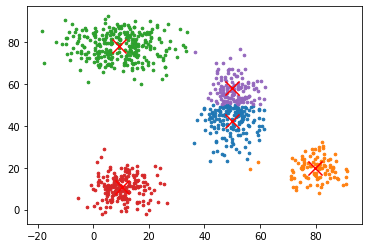

In [36]:
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

centroids = kmeans(synthetic_data, centroids)
silhouette_coefficient = silhouette_score(synthetic_data, centroids)

print('silhouette_coefficient =', silhouette_coefficient)
plot_clusters(synthetic_data, centroids)

**Exercise:**

* Run the clustering multiple times and pay attention to the results.
* In the *Discussion* below, describe your observations and discuss reasons for the possibly strong or weak performance of the algorithm. If you identify any weaknesses, suggest a possible solution.

## Discussion

Multiple executions reveal the varying clustering quality. This is due to the randomly initialized centroids and the sensitivity of the k-means algorithm to it. I.e. the cluster quality depends highly on the initial centroids.

## Comments

Our k-means clustering implementation can be characterized as a naive. This is for following reasons:

* We are evaluating only one `k` value instead of trying multiple.
* We are initializing the centroids randomly instead of using some heuristic.
* We are initializing and evaluating only one set of centroids instead of initializing multiple sets and analyzing their SSE (Sum of Squared Errors) or Silhouette Coefficient.

✌️